<h2>Imports and Setup</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
listings = pd.read_csv('listings-summary.csv')

<h2>Dataset Explortation</h2>

In [3]:
listings.shape

(37548, 18)

In [4]:
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [5]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,0.27,3,365,0,NaN
1,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,83.0,30,195,2024-10-05,1.04,1,185,4,NaN
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.03,2,83,0,NaN
3,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,71.0,30,250,2024-10-31,1.37,1,284,4,NaN
4,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,NaN,30,13,2022-09-12,0.08,2,0,0,NaN


In [6]:
# Clean NAs
listings['reviews_per_month'].fillna(0,inplace=True)

In [7]:
# Drop host name column
listings.drop(['host_name'], axis=1, inplace=True)

<h2>Analysis & Visualizations</h2>

<h3>Listings by Host</h3>

In [8]:
top_hosts = listings['host_id'].value_counts().head(10)

[Text(0, 0, '107434423'),
 Text(1, 0, '3223938'),
 Text(2, 0, '446820235'),
 Text(3, 0, '305240193'),
 Text(4, 0, '19303369'),
 Text(5, 0, '501999278'),
 Text(6, 0, '200239515'),
 Text(7, 0, '162280872'),
 Text(8, 0, '204704622'),
 Text(9, 0, '501499086')]

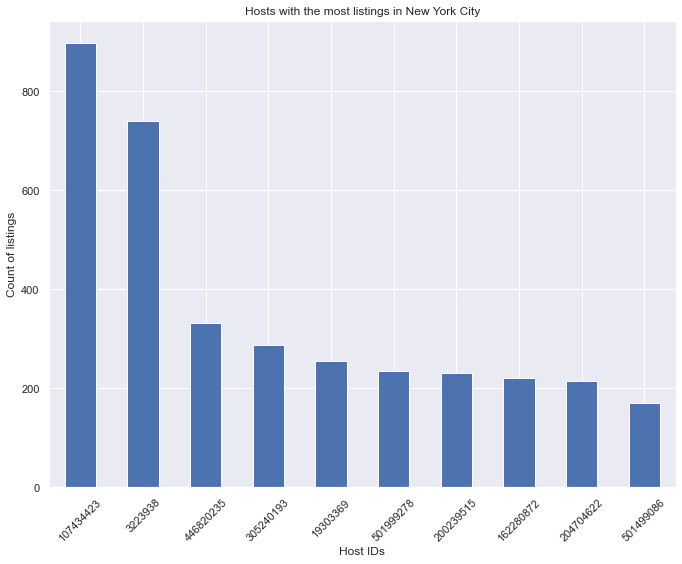

In [16]:
# Create bar chart with seaborn
sns.set(rc={'figure.figsize':(10,8)})
top_hosts_bar = top_hosts.plot(kind='bar')
# Set axes
top_hosts_bar.set_xlabel('Host IDs')
top_hosts_bar.set_ylabel('Count of listings')
# Adjust labels
top_hosts_bar.set_title('Hosts with the most listings in New York City')
top_hosts_bar.set_xticklabels(top_hosts_bar.get_xticklabels(), rotation=45)

<h3>Listings by Bourough</h3>

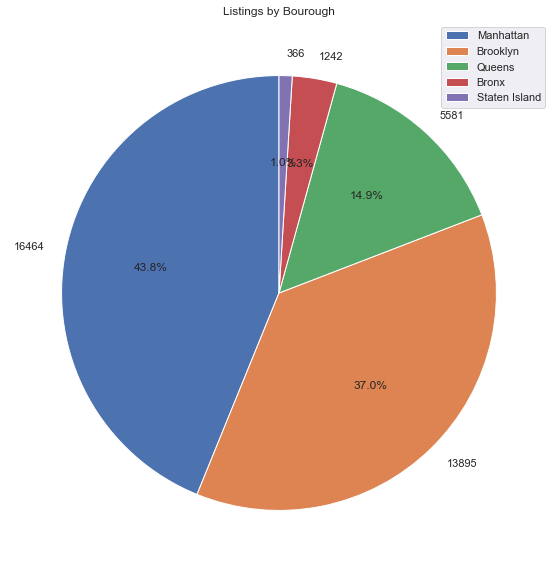

In [10]:
# Create list of bouroughs by indexing neighbourhood_group values
labels = listings.neighbourhood_group.value_counts().index
#explode = (0, 1, 0, 0, 0)
# Define shape by count of listings in each bourough
shape = listings.neighbourhood_group.value_counts().values

# Define figure size
plt.figure(figsize=(10,10))
# Define pie chart with percentage labels
plt.pie(shape, labels=shape, autopct = '%1.1f%%', startangle=90)
# Add legend
plt.legend(labels)
# Add title
plt.title("Listings by Bourough")
# Display pie chart
plt.show()

<h3>Create Maps of Listings</h3>

<h4>Find Min and Max Long/Lat values for mapping</h4>

In [11]:
coord = listings.loc[:,['longitude','latitude']]
coord.describe()

,longitude,latitude
count,37548.000000,37548.000000
mean,-73.946768,40.728667
std,0.054777,0.056510
min,-74.251907,40.500366
25%,-73.983042,40.688400
50%,-73.954420,40.725990
75%,-73.927600,40.762410
max,-73.713650,40.911390


<h4>Map Listings, Color Coordinate by Bourough</h4>

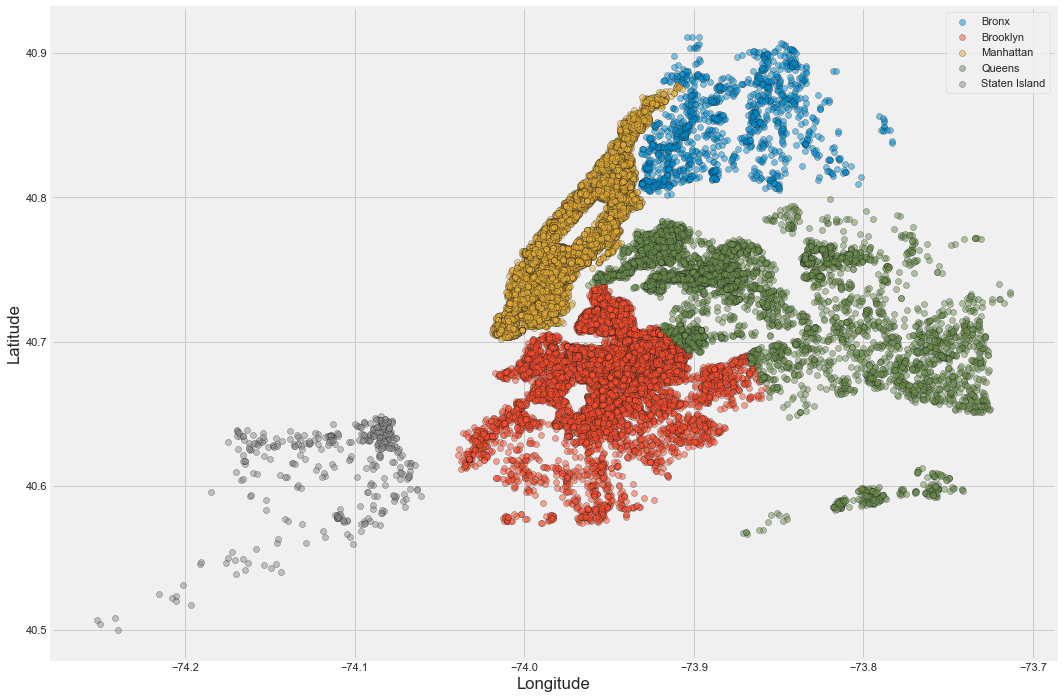

In [12]:
plt.figure(figsize=(18,12))
plt.style.use('fivethirtyeight')
ax = plt.gca()
groups = listings.groupby('neighbourhood_group')
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

<h4>Density Map</h4>

In [41]:
map_folium = folium.Map([40.728667, -73.946768],zoom_start=10.0)
HeatMap(listings[['latitude','longitude']].dropna(),radius=8).add_to(map_folium)
display(map_folium)